In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')


In [28]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [29]:
Y_train

array([9, 9, 1, ..., 6, 9, 7])

In [30]:
# def init_params():
#     W1 = np.random.rand(10,784)
#     b1 = np.random.rand(10, 1)
    
#     W2 = np.random.rand(10,10)
#     b2 = np.random.rand(10, 1)
    
#     return W1, b1, W2, b2
    
# def ReLU(Z):
#     return np.maximum(0,Z)

# def softmax(Z):
#     return (np.exp(Z) / np.sum(np.exp(Z)))

    
# # def forward_prop(W1, b1, W2, b2, X):
# #     Z1 = W1.dot(X) + b1
# #     A1 = ReLU(Z1)
# #     Z2 = W2.dot(A1) + b2
# #     A2 = softmax(A1)
# def forward_prop(W1, b1, W2, b2, X):
#     Z1 = W1.dot(X) + b1
#     A1 = ReLU(Z1)
#     Z2 = W2.dot(A1) + b2
#     A2 = softmax(A1)
#     return Z1, A1, Z2, A2
    
# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1 
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

# def deriv_ReLU(Z):
#     return Z > 0
    
# def back_prop(Z1, A1, Z2, A2, W2,X , Y):
#     m = Y.size
    
#     one_hot_Y = one_hot(Y)
    
#     dZ2 = A2 - one_hot_Y
#     dW2 = 1/ m * dZ2.dot(A1.T)
#     db2 = 1/ m * np.sum(dZ2, 2)
    
#     dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
#     dW1 = 1/ m * dZ1.dot(X.T)
#     db1 = 1/ m * np.sum(dZ1, 2)
    
#     return dW1, db1, dW2, db2

# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1= W1 - alpha * dW1
#     b1 = b1 - alpha * db1
#     W2 = W2 - alpha * dW2
#     b2 = b2 - alpha * db2
    
#     return W1, b1, W2, b2

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    
    
    
    
    

In [31]:
# def get_predictions(A2):
#     return np.argmax(A2, 0)

# def get_accuracy(predictions, Y):
#     print(predictions, Y)
#     return np.sum(predictions == Y) / Y.size

# # def gradient_descent(X, Y, iterations, alpha):
# #     W1, b1, W2, b2 = init_params()
# #     for i in range(iterations):
# #         Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
# #         dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
# #         W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
# #         if i% 10 == 0:
# #             print("Iteration: ",i)
# #             print("Accuracy: ",get_accuracy(get_predictions(A2), Y))
# #     return W1, b1, W2, b2
# def gradient_descent(X, Y, iterations, alpha):
#     W1, b1, W2, b2 = init_params()
#     for i in range(iterations):
#         Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
#         dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
#         W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
#         if i% 10 == 0:
#             print("Iteration: ",i)
#             print("Accuracy: ",get_accuracy(get_predictions(A2), Y))
#     return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [32]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[2 7 0 ... 2 4 7] [9 9 1 ... 6 9 7]
0.09734146341463415
Iteration:  10
[2 8 1 ... 1 4 3] [9 9 1 ... 6 9 7]
0.2691219512195122
Iteration:  20
[2 8 1 ... 1 8 3] [9 9 1 ... 6 9 7]
0.38165853658536586
Iteration:  30
[2 7 1 ... 1 8 3] [9 9 1 ... 6 9 7]
0.4588780487804878
Iteration:  40
[2 7 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.5142926829268293
Iteration:  50
[2 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.5568048780487805
Iteration:  60
[6 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.5965853658536585
Iteration:  70
[6 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.6291951219512195
Iteration:  80
[4 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.6548048780487805
Iteration:  90
[4 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.6764878048780488
Iteration:  100
[4 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.6949512195121951
Iteration:  110
[4 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.7112682926829268
Iteration:  120
[4 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.7253414634146341
Iteration:  130
[4 9 1 ... 2 8 7] [9 9 1 ... 6 9 7]
0.7375365853658536
Iteration:  140

In [33]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


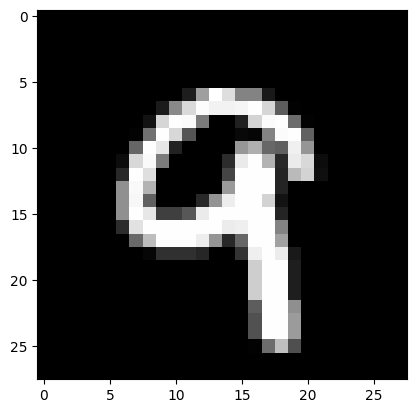

Prediction:  [9]
Label:  9


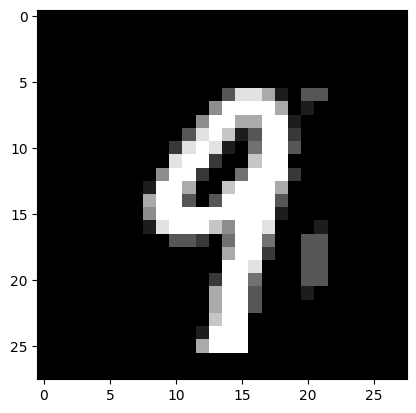

Prediction:  [1]
Label:  1


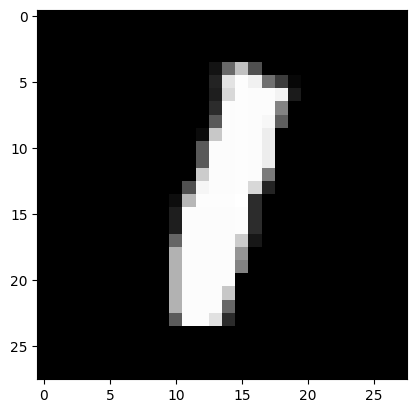

Prediction:  [9]
Label:  9


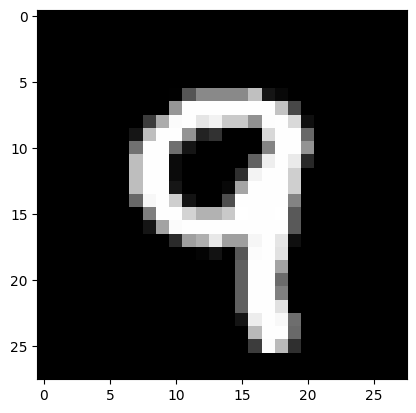

In [34]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [35]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 6 9 6 6 9 1 0 7 5 9 3 8 2 2 5 3 8 7 9 4 1 1 3 1 8 7 3 7 0 5 0 0 9 2 2 0
 7 5 4 9 8 3 1 7 0 8 1 8 7 1 3 6 4 7 0 5 2 3 2 1 4 0 1 2 9 7 2 5 7 3 1 6 3
 0 0 4 5 7 0 0 0 4 0 7 4 7 9 8 7 7 2 3 2 9 5 5 2 9 1 7 7 6 1 9 6 6 0 9 3 6
 2 3 7 8 4 6 7 2 9 6 8 0 0 3 8 3 9 0 8 6 7 5 4 9 7 7 3 4 6 0 0 0 1 2 2 9 8
 5 0 2 4 8 1 5 0 8 1 0 8 1 6 8 8 3 2 4 9 7 6 9 8 6 7 0 4 7 7 0 1 3 8 4 6 5
 8 1 4 9 7 0 9 4 8 9 1 6 6 6 6 8 0 5 6 1 0 4 1 1 0 7 3 4 1 9 9 1 8 7 8 5 2
 5 2 8 3 4 1 2 9 3 9 0 4 1 6 8 7 4 7 1 8 7 5 3 0 5 5 1 5 1 6 5 3 6 3 1 7 9
 8 9 0 4 2 5 3 3 1 4 0 5 2 8 0 7 2 3 1 8 3 4 7 3 6 7 2 6 6 5 7 1 0 0 7 5 8
 6 8 9 9 6 6 8 9 6 1 5 2 0 1 9 2 1 3 8 7 4 6 7 9 4 3 8 2 9 6 0 3 0 5 2 5 5
 3 6 3 3 0 5 8 2 0 2 4 9 9 1 8 1 2 5 2 3 6 9 2 6 7 1 0 4 2 0 6 2 7 1 5 0 3
 1 7 8 9 0 9 4 0 7 3 1 9 5 3 2 3 7 6 0 0 8 8 4 0 7 7 6 3 3 6 7 2 2 8 0 7 9
 8 8 9 1 5 3 2 5 3 3 9 4 7 8 1 5 3 2 1 8 1 8 2 7 3 1 1 1 8 0 7 8 9 8 7 6 9
 9 1 2 2 0 1 7 4 1 5 3 2 1 7 1 4 1 1 6 2 0 7 7 5 3 3 8 1 0 5 1 6 1 9 5 8 4
 4 9 9 5 4 6 1 4 2 8 2 4 

0.86